In [2]:
!pip install pandas numpy scikit-learn matplotlib seaborn imbalanced-learn 
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.combine import SMOTETomek
data = pd.read_csv('data_after_smote.csv')


In [3]:

data = pd.get_dummies(data, columns=['protocol_type', 'service', 'flag'])
X = data.drop('class', axis=1)
y = data['class']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),    # 1 tầng ẩn với 100 neuron
    activation='relu',
    solver='adam',
    max_iter=500,                 # tăng số vòng lặp tối đa
    tol=1e-5,                    # giảm ngưỡng dừng sớm
    random_state=42,
    verbose=True
)
# 7. Huấn luyện mô hình
mlp_model.fit(X_train_scaled, y_train)

# 8. Dự đoán tập test
y_pred = mlp_model.predict(X_test_scaled)

Iteration 1, loss = 0.07923036
Iteration 2, loss = 0.02022440
Iteration 3, loss = 0.01595001
Iteration 4, loss = 0.01388415
Iteration 5, loss = 0.01261848
Iteration 6, loss = 0.01169385
Iteration 7, loss = 0.01101404
Iteration 8, loss = 0.01057568
Iteration 9, loss = 0.01017564
Iteration 10, loss = 0.00983398
Iteration 11, loss = 0.00953084
Iteration 12, loss = 0.00932638
Iteration 13, loss = 0.00915374
Iteration 14, loss = 0.00896368
Iteration 15, loss = 0.00880726
Iteration 16, loss = 0.00866584
Iteration 17, loss = 0.00855654
Iteration 18, loss = 0.00838298
Iteration 19, loss = 0.00835703
Iteration 20, loss = 0.00825864
Iteration 21, loss = 0.00812455
Iteration 22, loss = 0.00803829
Iteration 23, loss = 0.00794453
Iteration 24, loss = 0.00785811
Iteration 25, loss = 0.00790802
Iteration 26, loss = 0.00770996
Iteration 27, loss = 0.00769519
Iteration 28, loss = 0.00763453
Iteration 29, loss = 0.00755795
Iteration 30, loss = 0.00755445
Iteration 31, loss = 0.00747472
Iteration 32, los

Classification Report:
                  precision    recall  f1-score   support

           back.       1.00      1.00      1.00     13618
buffer_overflow.       1.00      1.00      1.00     13619
      ftp_write.       1.00      1.00      1.00     13619
   guess_passwd.       1.00      1.00      1.00     13619
           imap.       1.00      1.00      1.00     13619
        ipsweep.       1.00      0.99      1.00     13619
           land.       1.00      1.00      1.00     13619
     loadmodule.       1.00      1.00      1.00     13619
       multihop.       1.00      0.99      1.00     13619
        neptune.       1.00      1.00      1.00     21440
           nmap.       0.99      1.00      1.00     13619
         normal.       1.00      0.99      1.00     19455
           perl.       1.00      1.00      1.00     13619
            phf.       1.00      1.00      1.00     13619
            pod.       0.99      1.00      1.00     13619
      portsweep.       1.00      1.00      1.00 

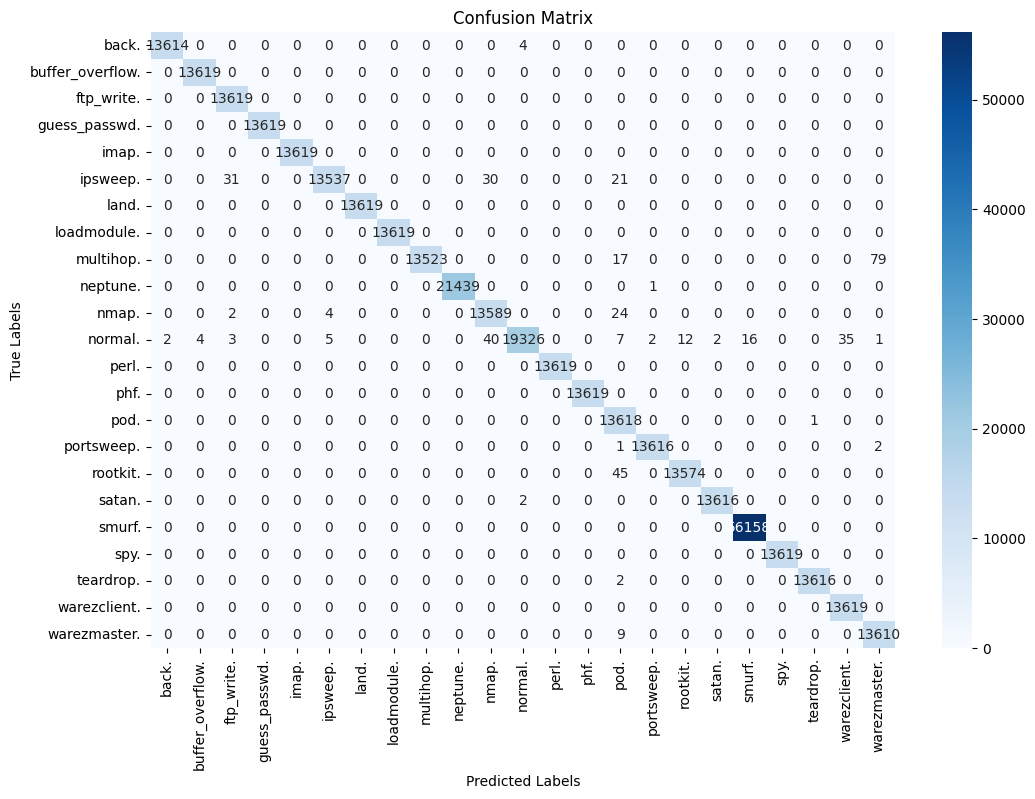

Iteration 1, loss = 0.09213525
Iteration 2, loss = 0.02215947
Iteration 3, loss = 0.01736057
Iteration 4, loss = 0.01509727
Iteration 5, loss = 0.01367025
Iteration 6, loss = 0.01259747
Iteration 7, loss = 0.01185956
Iteration 8, loss = 0.01128370
Iteration 9, loss = 0.01080381
Iteration 10, loss = 0.01050730
Iteration 11, loss = 0.01017866
Iteration 12, loss = 0.00993254
Iteration 13, loss = 0.00971830
Iteration 14, loss = 0.00957270
Iteration 15, loss = 0.00930359
Iteration 16, loss = 0.00916913
Iteration 17, loss = 0.00907757
Iteration 18, loss = 0.00894403
Iteration 19, loss = 0.00876729
Iteration 20, loss = 0.00867358
Iteration 21, loss = 0.00862964
Iteration 22, loss = 0.00855075
Iteration 23, loss = 0.00840179
Iteration 24, loss = 0.00835051
Iteration 25, loss = 0.00824290
Iteration 26, loss = 0.00814396
Iteration 27, loss = 0.00808238
Iteration 28, loss = 0.00806024
Iteration 29, loss = 0.00794098
Iteration 30, loss = 0.00791289
Iteration 31, loss = 0.00784812
Iteration 32, los

In [5]:
# 9. In báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# 10. Vẽ confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=mlp_model.classes_)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=mlp_model.classes_, yticklabels=mlp_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 11. Đánh giá bằng cross-validation (f1_macro)
cv_scores = cross_val_score(mlp_model, X_train_scaled, y_train, cv=5, scoring='f1_macro')
print("Cross-Validation F1 Macro Scores:", cv_scores)
print("Average F1 Macro Score:", np.mean(cv_scores))


Accuracy: 0.9989064234090356
                  precision    recall  f1-score   support

           back.       1.00      1.00      1.00     13618
buffer_overflow.       1.00      1.00      1.00     13619
      ftp_write.       1.00      1.00      1.00     13619
   guess_passwd.       1.00      1.00      1.00     13619
           imap.       1.00      1.00      1.00     13619
        ipsweep.       1.00      0.99      1.00     13619
           land.       1.00      1.00      1.00     13619
     loadmodule.       1.00      1.00      1.00     13619
       multihop.       1.00      0.99      1.00     13619
        neptune.       1.00      1.00      1.00     21440
           nmap.       0.99      1.00      1.00     13619
         normal.       1.00      0.99      1.00     19455
           perl.       1.00      1.00      1.00     13619
            phf.       1.00      1.00      1.00     13619
            pod.       0.99      1.00      1.00     13619
      portsweep.       1.00      1.00     

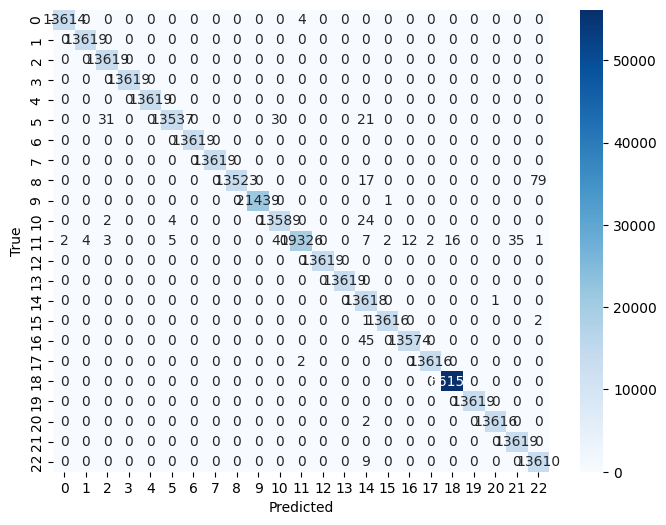

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Báo cáo chi tiết
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. Enable mixed precision
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

# ==== Giả sử đã có X, y ở đây ====
# X = ...  # (samples, features)
# y = ...  # nhãn dạng chuỗi hoặc số nguyên

# 2. Encode label và one-hot
le = LabelEncoder()
y_encoded = le.fit_transform(y)
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# 3. Chia train/test
X_train, X_test, y_train_raw, y_test_raw = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 4. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. One-hot cho train/test
y_train_categorical = to_categorical(y_train_raw, num_classes=num_classes)
y_test_categorical = to_categorical(y_test_raw, num_classes=num_classes)

# 6. Tách validation từ train (10%)
val_ratio = 0.1
val_size = int(len(X_train_scaled) * val_ratio)

X_val_scaled = X_train_scaled[:val_size]
y_val_categorical = y_train_categorical[:val_size]

X_train_scaled2 = X_train_scaled[val_size:]
y_train_categorical2 = y_train_categorical[val_size:]

# 7. Tạo tf.data.Dataset cho train và validation
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled2, y_train_categorical2))
train_dataset = train_dataset.shuffle(buffer_size=10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val_categorical))
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# 8. Xây dựng model MLP với Dropout, output layer dtype float32
model = Sequential([
    InputLayer(input_shape=(X_train_scaled.shape[1],), name='input_layer'),
    Dense(100, activation='relu', name='dense_1'),
    Dense(num_classes, activation='softmax', dtype='float32', name='output_layer')
])

# 9. Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 10. Early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# 11. Huấn luyện
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset,
    callbacks=[early_stop],
    verbose=1
)

model.save('mlp_model.h5', include_optimizer=False)

# 13. Dự đoán test
y_pred_prob = model.predict(X_test_scaled)

d:\TaiLieuHocTap\DoAn2\mophong\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
20781/20781 ━━━━━━━━━━━━━━━━━━━━ 75s 3ms/step - accuracy: 0.9682 - loss: 0.1330 - val_accuracy: 0.9937 - val_loss: 0.0189
Epoch 2/50
20781/20781 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - accuracy: 0.9939 - loss: 0.0188 - val_accuracy: 0.9937 - val_loss: 0.0165
Epoch 3/50
20781/20781 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - accuracy: 0.9951 - loss: 0.0150 - val_accuracy: 0.9946 - val_loss: 0.0142
Epoch 4/50
20781/20781 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - accuracy: 0.9959 - loss: 0.0139 - val_accuracy: 0.9965 - val_loss: 0.0129
Epoch 5/50
20781/20781 ━━━━━━━━━━━━━━━━━━━━ 78s 4ms/step - accuracy: 0.9962 - loss: 0.0131 - val_accuracy: 0.9971 - val_loss: 0.0102
Epoch 6/50
20781/20781 ━━━━━━━━━━━━━━━━━━━━ 91s 4ms/step - accuracy: 0.9965 - loss: 0.0124 - val_accuracy: 0.9970 - val_loss: 0.0095
Epoch 7/50
20781/20781 ━━━━━━━━━━━━━━━━━━━━ 89s 4ms/step - accuracy: 0.9967 - loss: 0.0118 - val_accuracy: 0.9970 - val_loss: 0.0098
Epoch 8/50
20781/20781 ━━━━━━━━━━━━━━━━━━━━ 74s 4ms/step - accuracy: 

11545/11545 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


In [8]:
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# 14. Đánh giá
y_pred_labels = le.inverse_transform(y_pred_classes)
y_test_labels = le.inverse_transform(y_test_raw)

print(classification_report(y_test_labels, y_pred_labels))

                  precision    recall  f1-score   support

           back.       1.00      1.00      1.00     13607
buffer_overflow.       1.00      0.99      0.99     13689
      ftp_write.       1.00      1.00      1.00     13627
   guess_passwd.       1.00      1.00      1.00     13583
           imap.       1.00      1.00      1.00     13644
        ipsweep.       1.00      0.99      0.99     13580
           land.       1.00      1.00      1.00     13695
     loadmodule.       1.00      1.00      1.00     13855
       multihop.       1.00      1.00      1.00     13677
        neptune.       1.00      1.00      1.00     21368
           nmap.       0.98      1.00      0.99     13572
         normal.       1.00      0.99      0.99     19405
           perl.       1.00      1.00      1.00     13581
            phf.       1.00      1.00      1.00     13674
            pod.       1.00      0.98      0.99     13729
      portsweep.       1.00      1.00      1.00     13597
        rootk

In [9]:
# In ra danh sách lớp (class labels)
print("Các lớp trong mô hình:")
for i, label in enumerate(le.classes_):
    print(f"Lớp {i}: {label}")

Các lớp trong mô hình:
Lớp 0: back.
Lớp 1: buffer_overflow.
Lớp 2: ftp_write.
Lớp 3: guess_passwd.
Lớp 4: imap.
Lớp 5: ipsweep.
Lớp 6: land.
Lớp 7: loadmodule.
Lớp 8: multihop.
Lớp 9: neptune.
Lớp 10: nmap.
Lớp 11: normal.
Lớp 12: perl.
Lớp 13: phf.
Lớp 14: pod.
Lớp 15: portsweep.
Lớp 16: rootkit.
Lớp 17: satan.
Lớp 18: smurf.
Lớp 19: spy.
Lớp 20: teardrop.
Lớp 21: warezclient.
Lớp 22: warezmaster.


In [10]:
for layer in model.layers:
    print(layer.name, type(layer))

dense_1 <class 'keras.src.layers.core.dense.Dense'>
output_layer <class 'keras.src.layers.core.dense.Dense'>


In [11]:
model_loaded = tf.keras.models.load_model('mlp_model.h5')
model_loaded.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 100)            │         3,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 23)             │         2,323 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,223 (24.31 KB)

 Trainable params: 6,223 (24.31 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
import json
from tensorflow.keras.models import load_model

model = load_model('mlp_model.h5')
model_config = json.loads(model.to_json())

print(model_config['config']['layers'][0])

{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': [None, 38], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_layer'}, 'registered_name': None}


In [18]:
print(json.dumps(model_config['config']['layers'][0], indent=4)) 

{
    "module": "keras.layers",
    "class_name": "InputLayer",
    "config": {
        "batch_shape": [
            null,
            38
        ],
        "dtype": "float32",
        "sparse": false,
        "ragged": false,
        "name": "input_layer"
    },
    "registered_name": null
}


In [19]:
!pip show tensorflow

Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: d:\TaiLieuHocTap\DoAn2\mophong\.venv\Lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


In [20]:
!pip show hls4ml

Name: hls4ml
Version: 1.1.0
Summary: Machine learning in FPGAs using HLS
Home-page: https://fastmachinelearning.org/hls4ml
Author: hls4ml Team
Author-email: 
License: Apache-2.0
Location: d:\TaiLieuHocTap\DoAn2\mophong\.venv\Lib\site-packages
Requires: h5py, numpy, pydigitalwavetools, pyyaml
Required-by: 


In [21]:
import tensorflow as tf
import tf2onnx

model = tf.keras.models.load_model('mlp_model_named.h5')

# Tạo tf.function
input_signature = [tf.TensorSpec([None, 38], tf.float32, name="input_layer")]

@tf.function(input_signature=input_signature)
def model_fn(x):
    return model(x)

# Chuyển sang ONNX
model_proto, _ = tf2onnx.convert.from_function(
    model_fn,
    input_signature=input_signature,
    opset=13,
)

with open("mlp_model.onnx", "wb") as f:
    f.write(model_proto.SerializeToString())


ERROR:tf2onnx.tfonnx:rewriter <function rewrite_constant_fold at 0x0000016CE9D3CF40>: exception `np.cast` was removed in the NumPy 2.0 release. Use `np.asarray(arr, dtype=dtype)` instead.


In [23]:

import onnx
from onnxsim import simplify

model_onnx = onnx.load("mlp_model.onnx")
model_simp, check = simplify(model_onnx)

if check:
    onnx.save(model_simp, "mlp_model_simplified.onnx")
else:
    print("Simplified ONNX model could not be validated")

In [24]:
import onnx
from onnx import helper, numpy_helper

# Load model ONNX
model = onnx.load('mlp_model.onnx')
graph = model.graph

In [33]:
cast_nodes = [node for node in graph.node if node.op_type == 'Cast']
print(f'Found {len(cast_nodes)} Cast nodes.')
# Tạo mapping từ output của Cast node đến input của nó
cast_mapping = {}
for node in cast_nodes:
    if len(node.input) == 1 and len(node.output) == 1:
        cast_mapping[node.output[0]] = node.input[0]
        print(f"Cast mapping: {node.output[0]} -> {node.input[0]}")

print(f"Cast mapping created: {cast_mapping}")


Found 0 Cast nodes.
Cast mapping created: {}


In [34]:
# Thay thế tất cả references đến Cast outputs
for node in graph.node:
    if node.op_type != 'Cast':
        for idx, inp in enumerate(node.input):
            if inp in cast_mapping:
                old_input = inp
                new_input = cast_mapping[inp]
                node.input[idx] = new_input
                print(f"Replaced {old_input} with {new_input} in node {node.name}")

# Xóa Cast nodes (iterate backwards để tránh index shifting)
nodes_removed = 0
for i in range(len(graph.node) - 1, -1, -1):
    if graph.node[i].op_type == 'Cast':
        removed_node = graph.node.pop(i)
        nodes_removed += 1
        print(f"Removed Cast node: {removed_node.name}")

print(f"Total Cast nodes removed: {nodes_removed}")

# Lưu model
onnx.save(model, 'mlp_model_no_cast.onnx')
print("Model saved without Cast nodes")

# Verify model sau khi sửa
try:
    onnx.checker.check_model(model)
    print("Model validation: PASSED")
except Exception as e:
    print(f"Model validation failed: {e}")

Total Cast nodes removed: 0
Model saved without Cast nodes
Model validation: PASSED


In [35]:
import onnx

# Kiểm tra model gốc
print("=== KIỂM TRA MODEL GỐC ===")
model_original = onnx.load('mlp_model.onnx')
cast_nodes_original = [node for node in model_original.graph.node if node.op_type == 'Cast']
print(f"Model gốc có {len(cast_nodes_original)} Cast nodes")

for i, node in enumerate(cast_nodes_original):
    print(f"Cast node {i}: {node.name}")
    print(f"  - Input: {list(node.input)}")
    print(f"  - Output: {list(node.output)}")

# Kiểm tra model đã xử lý
print("\n=== KIỂM TRA MODEL ĐÃ XỬ LÝ ===")
model_processed = onnx.load('mlp_model_no_cast.onnx')
cast_nodes_processed = [node for node in model_processed.graph.node if node.op_type == 'Cast']
print(f"Model đã xử lý có {len(cast_nodes_processed)} Cast nodes")

# So sánh
print(f"\n=== KẾT QUẢ ===")
print(f"Đã xóa: {len(cast_nodes_original) - len(cast_nodes_processed)} Cast nodes")

if len(cast_nodes_original) == 0:
    print("✅ Model ban đầu không có Cast nodes - Không cần xử lý")
else:
    if len(cast_nodes_processed) == 0:
        print("✅ Đã xóa thành công tất cả Cast nodes")
    else:
        print("⚠️ Vẫn còn Cast nodes chưa được xóa")

=== KIỂM TRA MODEL GỐC ===
Model gốc có 2 Cast nodes
Cast node 0: sequential_4_1/Cast
  - Input: ['input_layer']
  - Output: ['sequential_4_1/Cast:0']
Cast node 1: sequential_4_1/Cast_1
  - Input: ['sequential_4_1/dense_1_1/Relu:0']
  - Output: ['sequential_4_1/Cast_1:0']

=== KIỂM TRA MODEL ĐÃ XỬ LÝ ===
Model đã xử lý có 0 Cast nodes

=== KẾT QUẢ ===
Đã xóa: 2 Cast nodes
✅ Đã xóa thành công tất cả Cast nodes


In [1]:

import os
import onnx
import numpy as np
import matplotlib.pyplot as plt

# Activate environment in notebook kernel 
import sys
sys.path.append(os.path.join(os.getcwd(), "finn"))

from finn.core.modelwrapper import ModelWrapper
from finn.transformation.general import GiveReadableTensorNames
from finn.transformation.fpgadataflow.prepare_ip import PrepareIP
from finn.transformation.fpgadataflow.convert_to_hls import ConvertToHLS
from finn.transformation.fpgadataflow.create_rtlsim import CreateRtlsim
from finn.transformation.fpgadataflow.create_hls_test import CreateHlsTest
from finn.util.basic import gen_finn_dt_tensor

# Load model ONNX
model_path = "mlp_model.onnx"
model = ModelWrapper(model_path)

print("Model inputs:", model.get_nodes_by_op_type("Input"))

## Thêm tên tensor dễ đọc 
model = model.transform(GiveReadableTensorNames())

#  Chuẩn bị IP và chuyển sang HLS
model = model.transform(PrepareIP())

# Convert mô hình sang HLS
model = model.transform(ConvertToHLS())

#  Tạo testbench HLS (tùy chọn)
model = model.transform(CreateHlsTest())

# Tạo mô phỏng RTL 
# model = model.transform(CreateRtlsim())

# Lưu mô hình sau chuyển đổi
out_model_path = "mlp_model_finn_hls.onnx"
model.save(out_model_path)
print(f"Model saved to {out_model_path}")

# Kiểm tra mô hình với đầu vào giả lập
input_tensor = gen_finn_dt_tensor(model.graph.input[0], batch_size=1)
output = model.run(input_tensor)

print("Output shape:", output.shape)
print("Output sample:", output)

ModuleNotFoundError: No module named 'finn'